# 필요한 모듈 임포트

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from random import sample
from scipy.stats import pearsonr

In [3]:
import chardet

# 파일의 일부분만 읽기
with open('Popular_Spotify_Songs.csv', 'rb') as file:
    raw_data = file.read(10000)  # 첫 10KB만 읽기

# 파일의 인코딩 감지
result = chardet.detect(raw_data)
encoding = result['encoding']

print(f"The encoding of the file is: {encoding}")

The encoding of the file is: ISO-8859-1


- track_name: 트랙이름
- artist(s)_name: 아티스트 이름
- artist_count: 이 트랙에 연관된 아티스트 수
- released_year: 트랙 출시일
- released_month: 트랙 출시달
- released_day: 트랙 출시일
- in_spotify_playlists: spotify 재생목록에 들어간 수
- in_spotify_charts: 인기목록 순위
- streams: 재생 수
- in_apple_playlists: apple 재생목록에 들어간 수
- in_apple_charts: 애플 뮤직 순위
- in_deezer_playlists: deezer playlist에 포함돼 있는가
- in_deezer_charts: deezer charts에 있는가
- in_shazam_charts: shazam charts에 있는가
- bpm:  bpm수
- key: The musical key in which the track is composed. 
- mode: major키 인지 minor키 인지
- danceability_: 얼마나 춤추기에 적합한지
- valence_: 트랙이 전하는 음악적 긍정성
- energy_: 트랙에 에너지가 얼마나 있는지
- acousticness_: 트랙이 얼마나 어쿠스틱한지
- instrumentalness_: 보컬이 얼마나 들어가있는지(악기를 제외한)
- liveness_speechiness_: 음성단어가 얼마나 들어가있는지

# 파일 불러오기

In [2]:
df = pd.read_csv('Popular_Spotify_Songs.csv', encoding='ISO-8859-1') # latin1

In [4]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [5]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

# 데이터 전처리

In [3]:
# df['streams'].unique() 결과 이상한 값이 있었다. 이를 NaN으로 바꿔준다.
# 숫자 형이여야 하는데 object인 것들 바꿔야 한다.
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   874 non-null    float64
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      896 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

In [9]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts        57
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [4]:
# 결측값 제거
df.dropna(subset=['streams', 'in_deezer_playlists', 'in_shazam_charts', 'key'], inplace=True)

In [11]:
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 748 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            748 non-null    object 
 1   artist(s)_name        748 non-null    object 
 2   artist_count          748 non-null    int64  
 3   released_year         748 non-null    int64  
 4   released_month        748 non-null    int64  
 5   released_day          748 non-null    int64  
 6   in_spotify_playlists  748 non-null    int64  
 7   in_spotify_charts     748 non-null    int64  
 8   streams               748 non-null    float64
 9   in_apple_playlists    748 non-null    int64  
 10  in_apple_charts       748 non-null    int64  
 11  in_deezer_playlists   748 non-null    float64
 12  in_deezer_charts      748 non-null    int64  
 13  in_shazam_charts      748 non-null    float64
 14  bpm                   748 non-null    int64  
 15  key                   748 no

In [13]:
numeric_columns = df.columns.difference(['track_name', 'artist(s)_name','key', 'mode'])
print(f"숫자형 컬럼 : {numeric_columns}\n숫자형 컬럼 수 : {len(numeric_columns)}")

숫자형 컬럼 : Index(['acousticness_%', 'artist_count', 'bpm', 'danceability_%', 'energy_%',
       'in_apple_charts', 'in_apple_playlists', 'in_deezer_charts',
       'in_deezer_playlists', 'in_shazam_charts', 'in_spotify_charts',
       'in_spotify_playlists', 'instrumentalness_%', 'liveness_%',
       'released_day', 'released_month', 'released_year', 'speechiness_%',
       'streams', 'valence_%'],
      dtype='object')
숫자형 컬럼 수 : 20


In [77]:
sorted(df['in_apple_playlists'].unique())
# sorted(df['in_apple_charts'].unique())
# df[['in_apple_playlists', 'in_apple_charts']]
# df['in_apple_playlists'].value_counts().tail()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 63,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 98,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 128,
 129,
 130,
 133,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 148,
 150,
 151,
 154,
 155,
 156,
 160,
 161,
 162,
 163,
 165,
 166,
 167,
 170,
 171,
 173,
 174,
 175,
 177,
 179,
 180,
 182,
 183,
 185,
 187,
 188,
 189,
 190,
 191,
 195,
 196,
 197,
 198,
 201,
 202,
 203,
 205,
 209,
 211,
 215,
 216,
 217,
 221,
 222,
 228,
 229,
 231,
 

0.15477455469517773


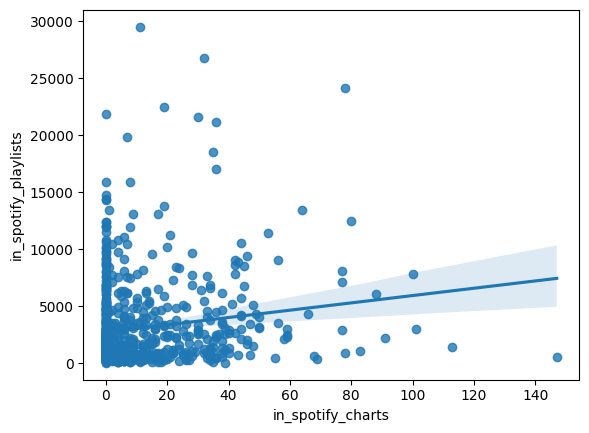

In [64]:
sns.regplot(data=df, x='in_spotify_charts', y='in_spotify_playlists')
corr, _ = pearsonr(df['in_spotify_charts'], df['in_spotify_playlists'])
print(corr)

0.23122719261443847


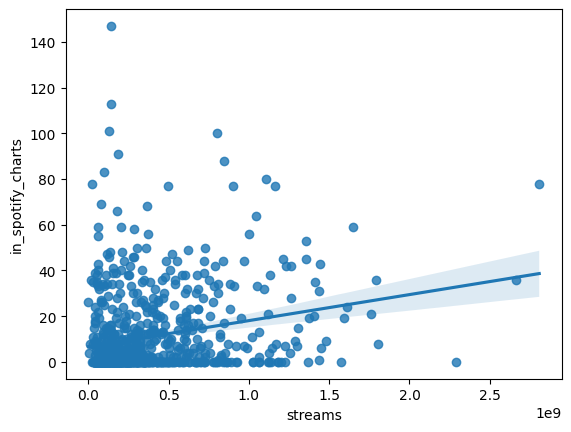

In [63]:
sns.regplot(data=df, x='streams', y='in_spotify_charts')
corr, _ = pearsonr(df['streams'], df['in_spotify_charts'])
print(corr)

# EDA

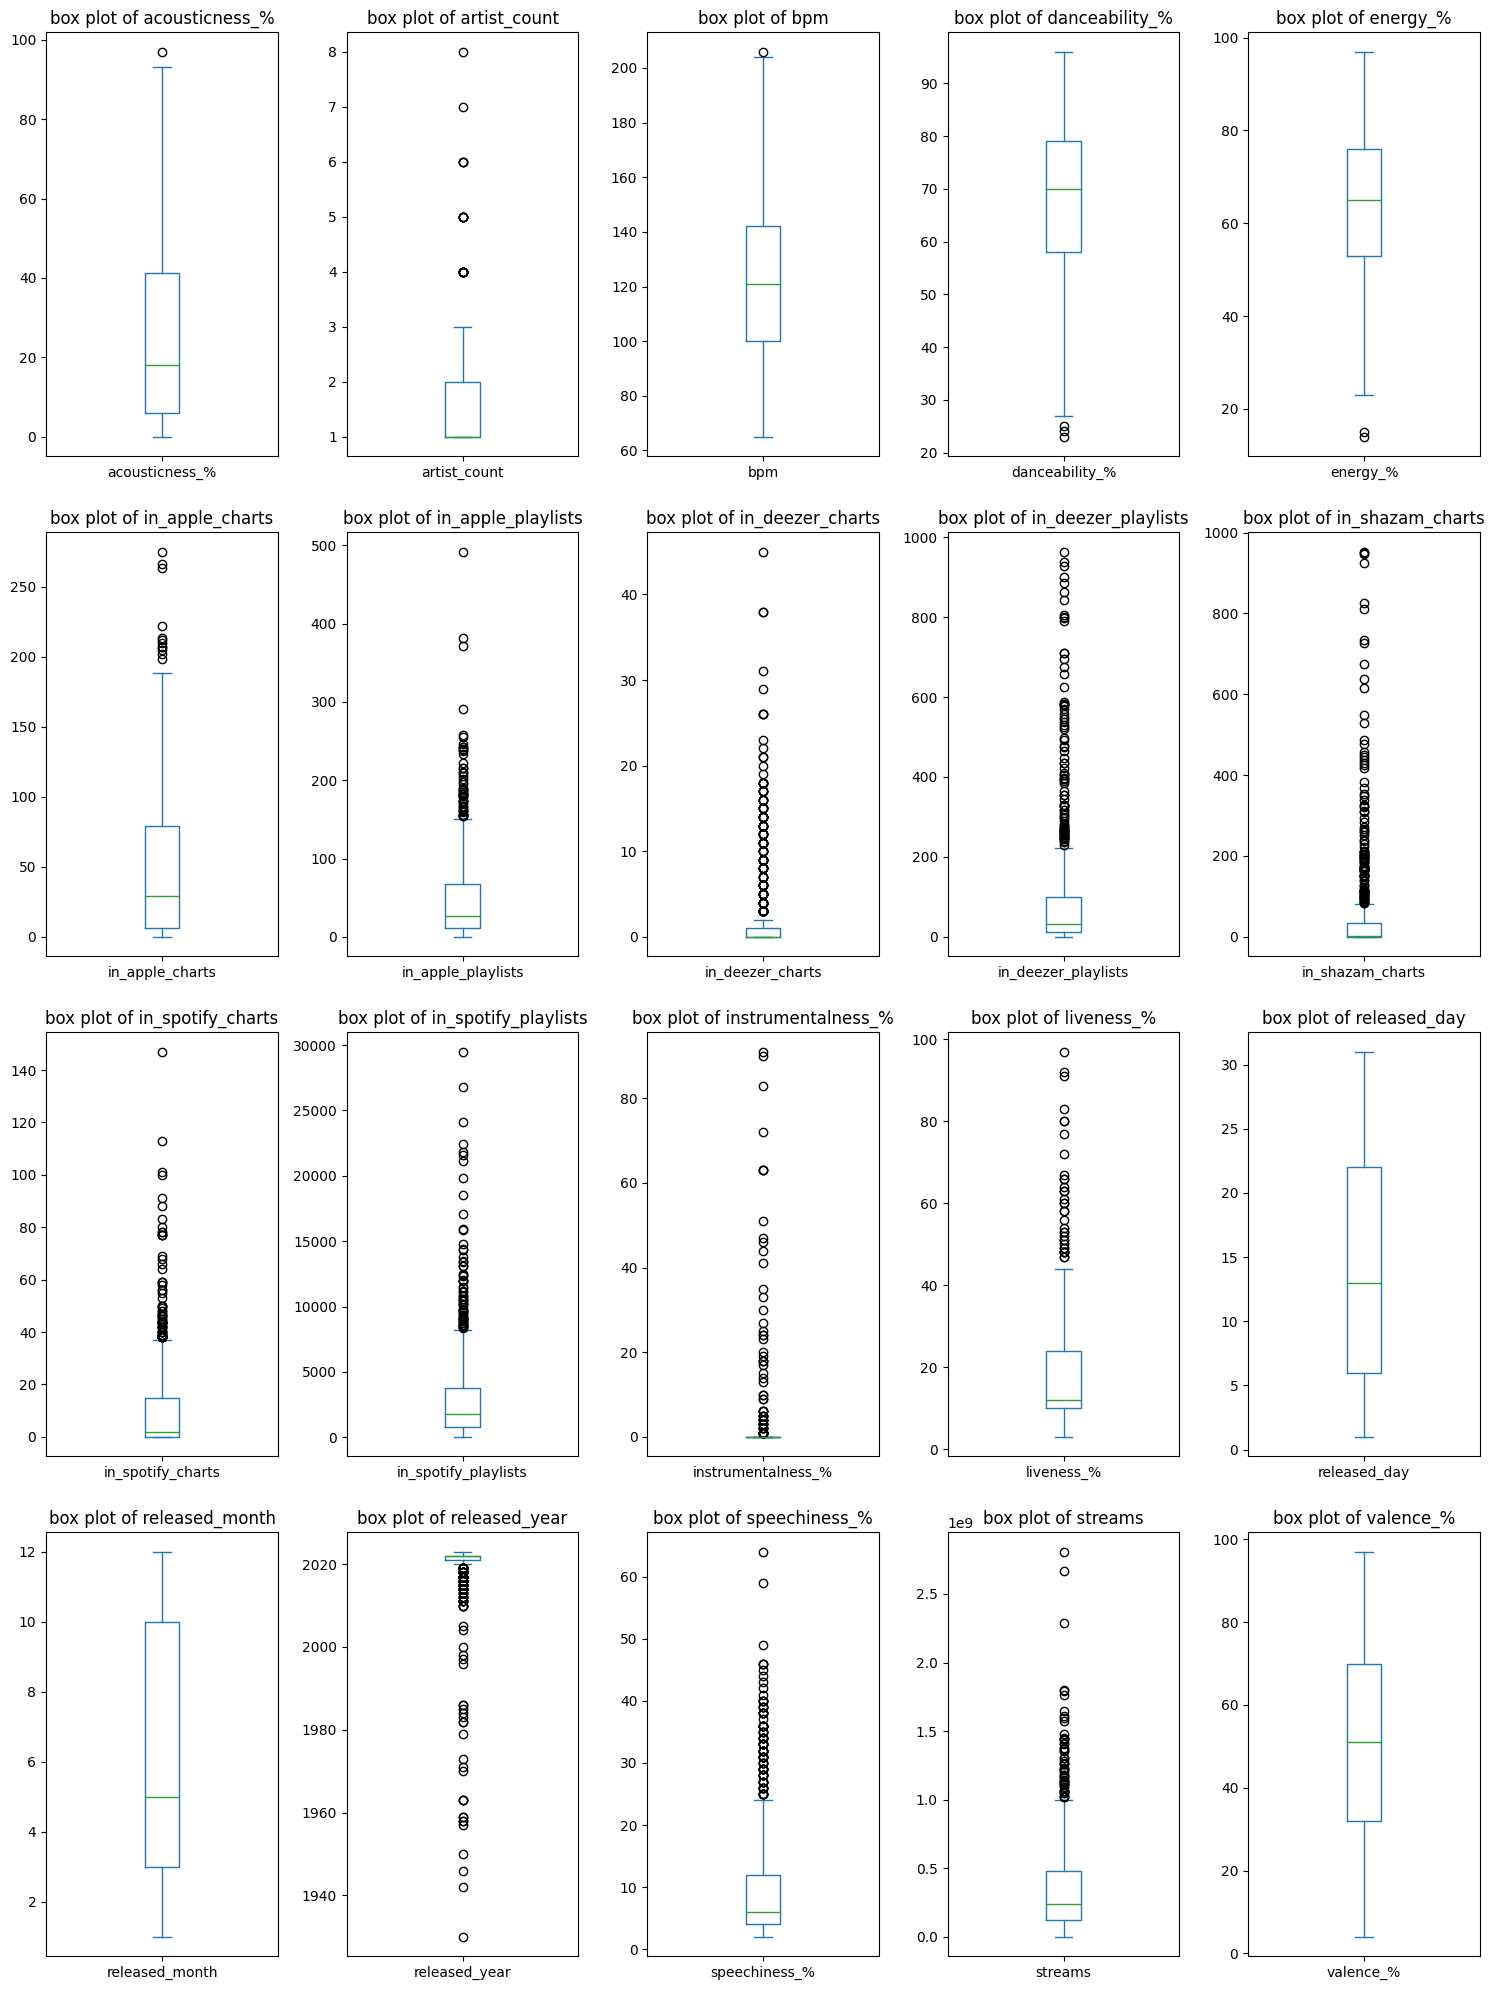

In [14]:
# numeric columns의 분포 확인
plt.figure(figsize=(15, len(numeric_columns)))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 5, i)
    df[col].plot(kind='box')
    plt.title(f"box plot of {col}")
plt.tight_layout()
plt.show()

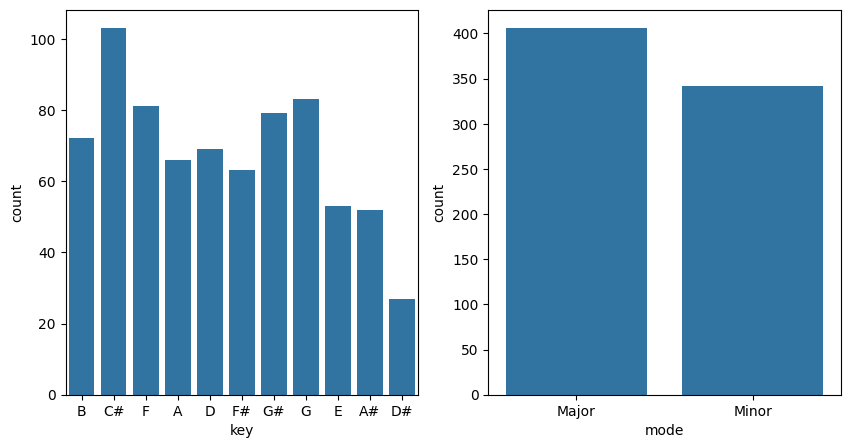

In [15]:
# object 타입 컬럼들 countplot(분포)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(df, x='key')
plt.subplot(1, 2, 2)
sns.countplot(df, x='mode')
plt.show()

In [16]:
df['artist(s)_name'].mode()

0    Taylor Swift
Name: artist(s)_name, dtype: object

In [7]:
df['track_name'].mode()

0                           About Damn Time
1                               Die For You
2    Let It Snow! Let It Snow! Let It Snow!
3                                  Miss You
4                          SPIT IN MY FACE!
5                            Take My Breath
Name: track_name, dtype: object

In [8]:
df[df['track_name'] == 'SPIT IN MY FACE!']

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
345,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,629,14,303216294.0,32,...,94,G#,Major,73,65,79,5,2,11,6
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854.0,1,...,166,C#,Major,70,57,57,9,20,11,7


In [10]:
# 트랙 이름과 아티스트 이름이 같다면 삭제한다.
# df = df.drop_duplicates(subset=['track_name', 'artist(s)_name'], keep='first')
# df.info()
# 같은 노래라도 다른 버전이 있을 수 있으므로 삭제하지 않는다. (실제로 사용된 key나 다른 값들이 다르다.)

## 어려웠던 점 : column이 무엇을 의미하는지 직관적으로 알 수 없었다.

In [20]:
df.loc[df['instrumentalness_%'].idxmax(), ['track_name', 'artist(s)_name', 'instrumentalness_%']]
# vocal보다 악기 소리가 더 많이 들린다.

track_name            Alien Blues
artist(s)_name           Vundabar
instrumentalness_%             91
Name: 684, dtype: object

In [21]:
df.loc[df['liveness_%'].idxmax(), ['track_name', 'artist(s)_name', 'liveness_%']]
# 녹음이 아니라 live적인 요소가 많이 들어감(즉석에서 부르는 느낌)

track_name                                 Vai Lï¿½ï¿½ Em Casa 
artist(s)_name    Marï¿½ï¿½lia Mendonï¿½ï¿½a, George Henrique &
liveness_%                                                   97
Name: 601, dtype: object

In [22]:
df.loc[df['speechiness_%'].idxmax(), ['track_name', 'artist(s)_name', 'speechiness_%']]
# 랩에는 말이 많다. 그런 노래는 speechiness가 높게 나온다.

track_name                 Cartï¿½ï¿½o B
artist(s)_name    MC Caverinha, KayBlack
speechiness_%                         64
Name: 247, dtype: object

In [23]:
df.loc[df['acousticness_%'].idxmax(), ['track_name', 'artist(s)_name', 'acousticness_%']]
# 전자 음향 장치를 거치지 않은 노래 (대표적으로 통기타의 선율만으로)

track_name        The Night We Met
artist(s)_name          Lord Huron
acousticness_%                  97
Name: 167, dtype: object

# Data Analysis

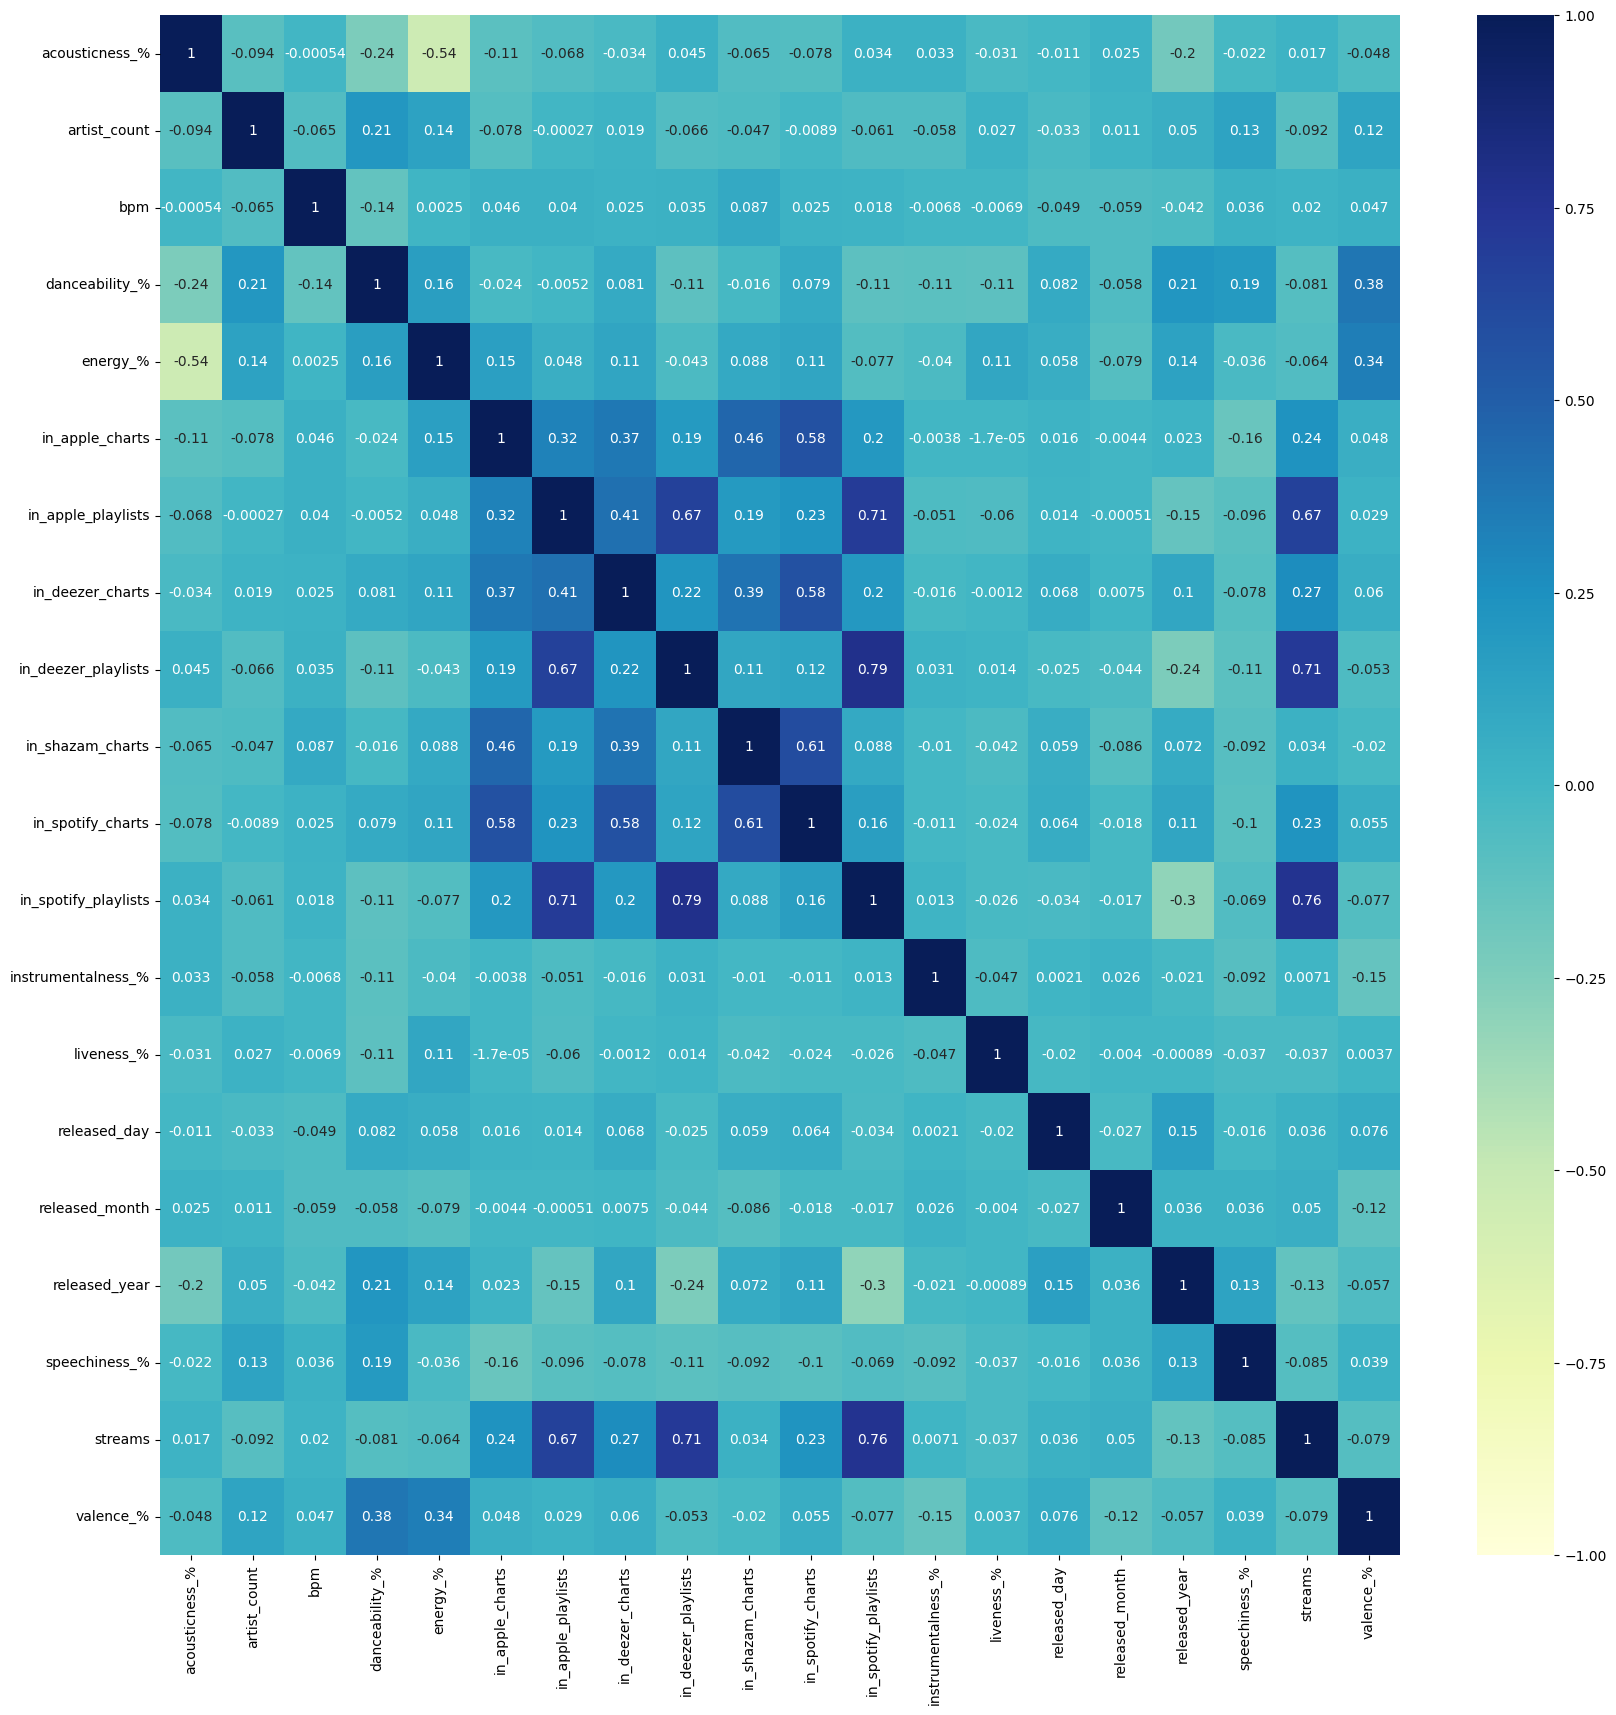

In [24]:
# 전체 숫자형 컬럼들의 상관관계 분석
plt.figure(figsize=(20, 20))
corr_of_df = df[numeric_columns].corr()
sns.heatmap(corr_of_df, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.show()

- chart와 playlist컬럼, 그리고 streams 컬럼이 서로 상관관계가 있어보인다.
- 특히 chart와 chart끼리, playlist와 playlist끼리
- streams는 playlists와 상관관계가 커보인다. (chart와의 관계는 playlists와의 관계보다 약하다.)
- valence와 danceability / valence와 energy
- acousticness와 energy
- 이를 시각화 해본다.

In [5]:
playlist_lst = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
chart_lst = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']

In [26]:
# 플레이리스트에서 가능한 조합을 구해서 산점도를 그린다.
def print_scatter_plot(lst_name):
    combos = list(combinations(lst_name, 2))
    how_many = len(combos)
    
    color_lst = ['blue', 'green', 'red', 'cyan', 'magenta', 'purple', 'orange']
    sample_color = sample(color_lst, how_many)
    row_count = how_many//3
    plt.figure(figsize=(16, 4*row_count))
    
    for i, comb in enumerate(combos, 1):
        
        plt.subplot(row_count, 3, i)
        x, y = comb[0], comb[1]
        
        # 피어슨 상관계수 계산
        corr, _ = pearsonr(df[x], df[y])
        
        sns.scatterplot(x=x, y=y, data=df, color=sample_color[i-1])
        sns.regplot(x=x, y=y, data=df, scatter=False, color='black')
        plt.title(f'Scatter Plot of {x}, {y}')
        plt.xlabel(f'{x}')
        plt.ylabel(f'{y}')
        # plt.gca().transAxes : (0,0)은 왼쪽 하단, (1,1)은 오른쪽 상단으로 맞추는 부분
        plt.text(0.05, 0.95, f'corr : {corr:.2f}', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top'
                , fontweight='bold')
    plt.tight_layout()
    plt.show()

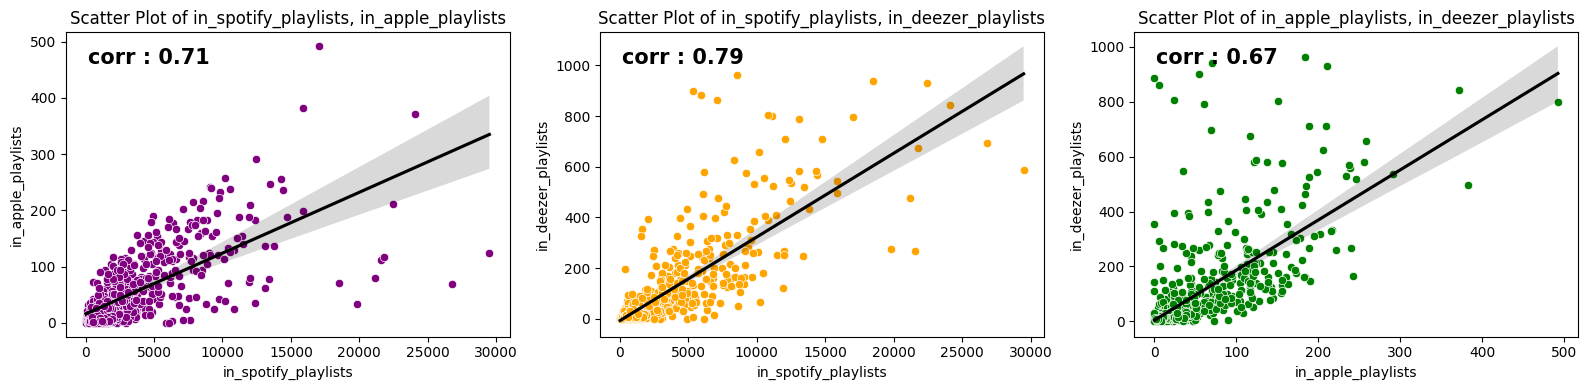

In [27]:
print_scatter_plot(playlist_lst)

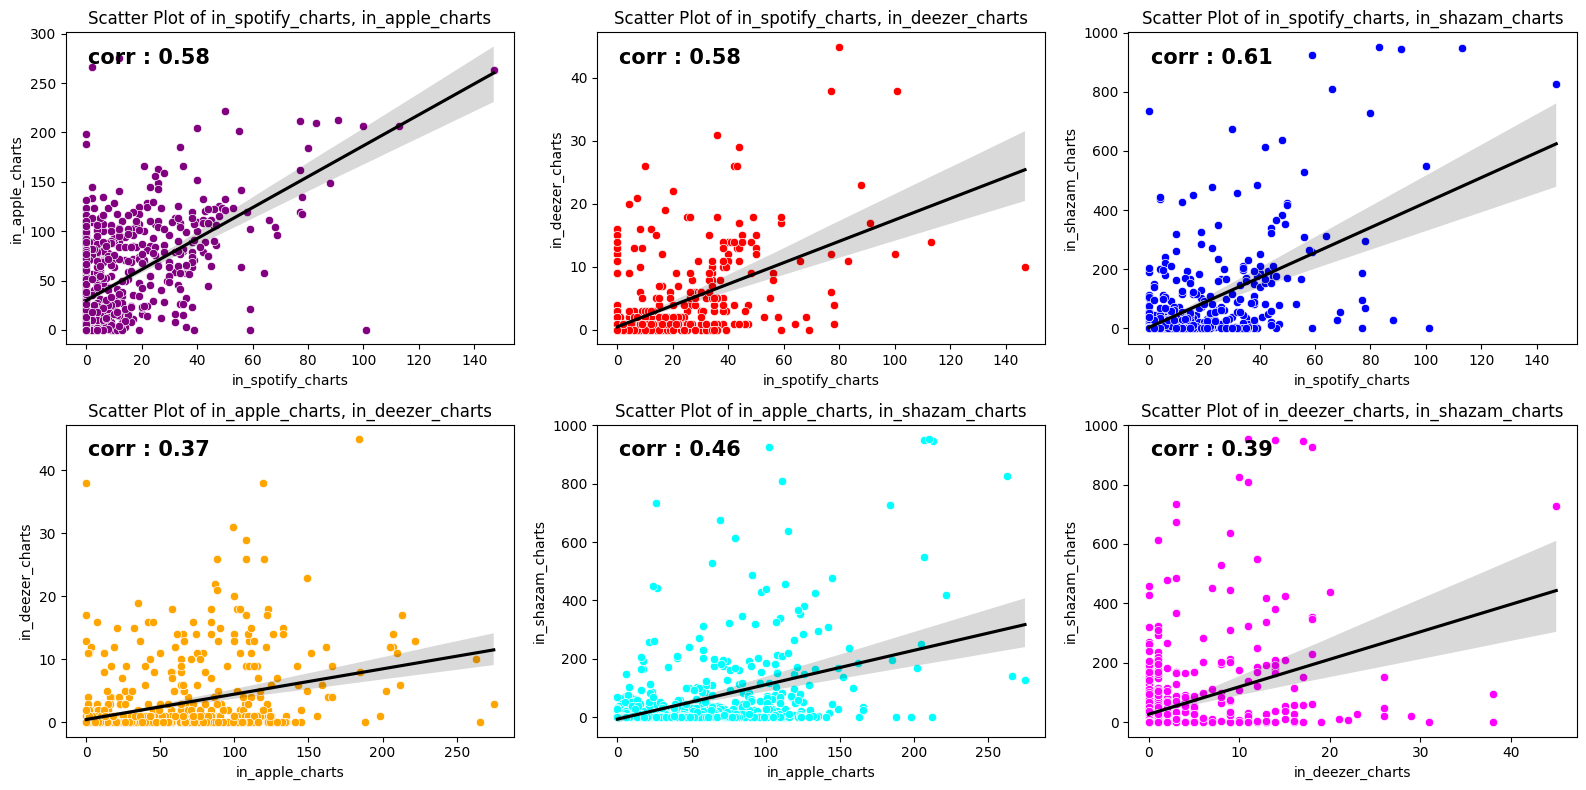

In [28]:
print_scatter_plot(chart_lst)

In [29]:
# streams x로 놓고 scatter 그리기
def print_scatter_plot_2(x_col_name, lst):
    color_lst = ['blue', 'green', 'red', 'cyan', 'magenta', 'purple', 'orange']
    sample_color = sample(color_lst, len(playlist_lst))
    how_many = len(lst)
    row_count = 1 if how_many < 3 else how_many//3
    
    plt.figure(figsize=(16, 4*row_count))
    
    for i, col in enumerate(lst, 1):
        corr, _ = pearsonr(df[x_col_name], df[col])
        plt.subplot(row_count, 3, i)
        sns.scatterplot(x=x_col_name, y=col, data=df, color=sample_color[i-1])
        sns.regplot(x=x_col_name, y=col, data=df, scatter=False, color='black') # scatter=True를 하면 산점도와 같이 그림
        plt.text(0.05, 0.95, f'corr : {corr:.2f}', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top'
                , fontweight='bold')
    plt.tight_layout()
    plt.show()

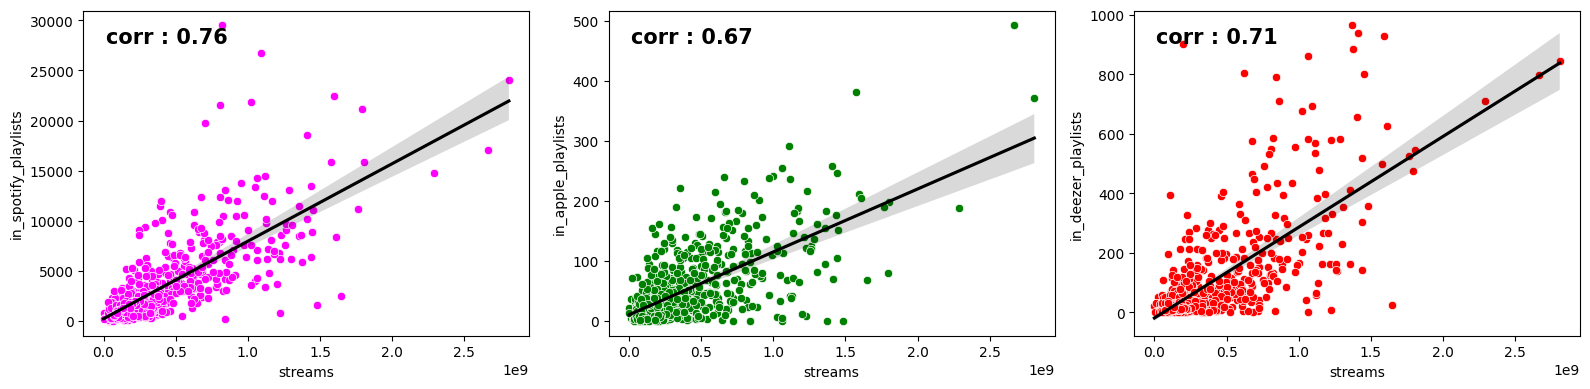

In [30]:
print_scatter_plot_2('streams', playlist_lst)

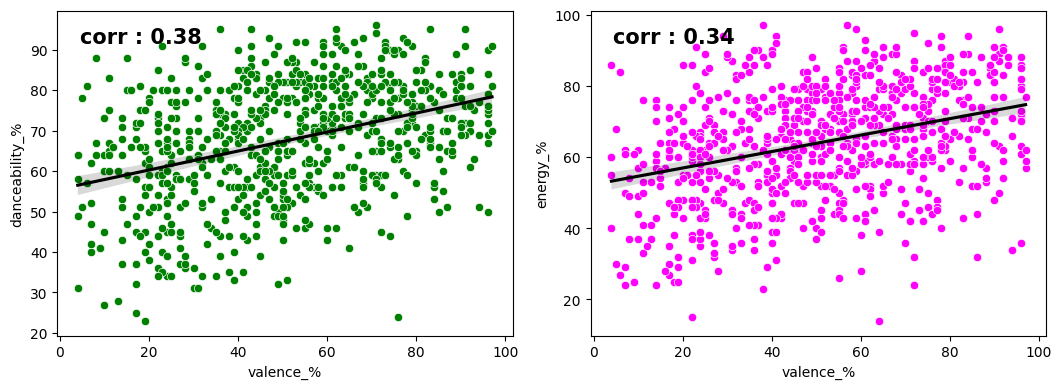

In [31]:
# valence와 danceability / valence와 energy
dance_energ_lst = ['danceability_%', 'energy_%']
print_scatter_plot_2('valence_%', dance_energ_lst)

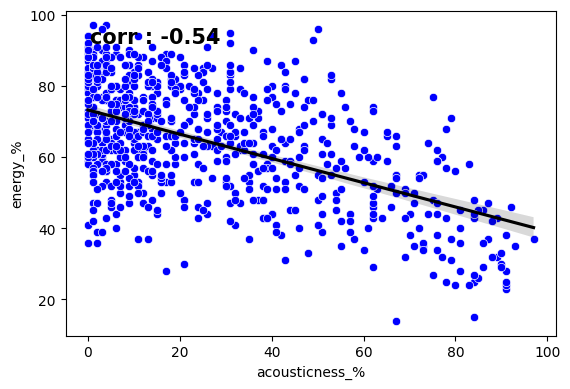

In [32]:
# acousticness와 energy
print_scatter_plot_2('acousticness_%', ['energy_%'])

- chart와 streams는 음의 상관관계가 나타나야 할것 같지만 그렇지 않다.
- 이는 데이터를 집계할 당시의 순위를 나타낸다. 따라서 시간이 지나 차트에서 내려갔을 수 있다. (최고순위를 의미하는게 아니므로)
- 이렇듯 집계 시점이 달라 뚜렷한 상관관계가 나타나지 않을 수 있다.
- 아니면, 순위 집계 방식이 실제로 재생횟수나 playlists와 관련이 없을 수 있다. 화제성과 같은 다른 특성을 사용할 수도 있다.

## 2000년도 이후 노래를 많이 출시한 top10 가수 알아보기

In [6]:
artist_song_count = df.loc[df['released_year']>=2000]['artist(s)_name'].value_counts().head(10)
artist_song_count

artist(s)_name
Taylor Swift        28
SZA                 17
Bad Bunny           16
The Weeknd          15
Harry Styles        12
Kendrick Lamar      11
Morgan Wallen        9
Feid                 8
Drake, 21 Savage     7
BTS                  7
Name: count, dtype: int64

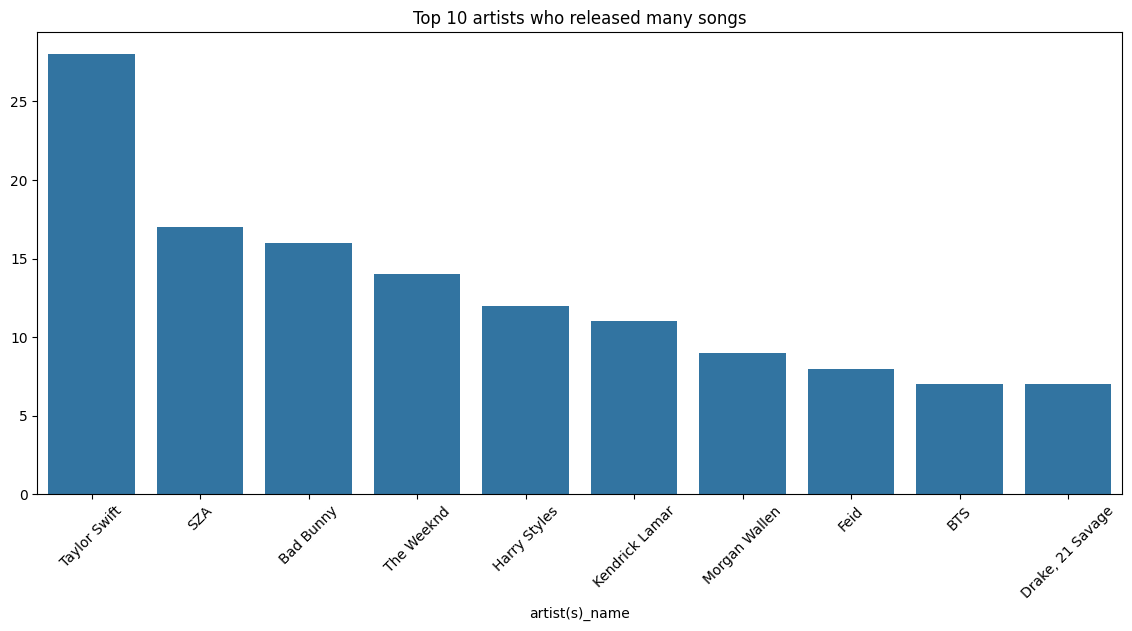

In [34]:
plt.figure(figsize=(14,6))
sns.barplot(x=artist_song_count.index, y=artist_song_count.values)
plt.xticks(rotation=45)
plt.title('Top 10 artists who released many songs')
plt.show()

In [50]:
df.groupby('artist(s)_name')['in_spotify_playlists'].sum().sort_values(ascending=False).head(10).reset_index()

,artist(s)_name,in_spotify_playlists
0,Taylor Swift,93125
1,Harry Styles,56953
2,Frank Ocean,51073
3,The Weeknd,50056
4,Bad Bunny,44812
5,SZA,41722
6,"Kendrick Lamar, Jay Rock",26792
7,Kendrick Lamar,26015
8,Kanye West,24457
9,"Post Malone, Swae Lee",24094


In [49]:
df.loc[df['artist(s)_name'].isin(artist_song_count.index)].groupby('artist(s)_name')['in_spotify_playlists'].sum().sort_values(ascending=False).reset_index()

,artist(s)_name,in_spotify_playlists
0,Taylor Swift,93125
1,Harry Styles,56953
2,The Weeknd,50056
3,Bad Bunny,44812
4,SZA,41722
5,Kendrick Lamar,26015
6,Feid,14276
7,"Drake, 21 Savage",13053
8,BTS,9425
9,Morgan Wallen,8578


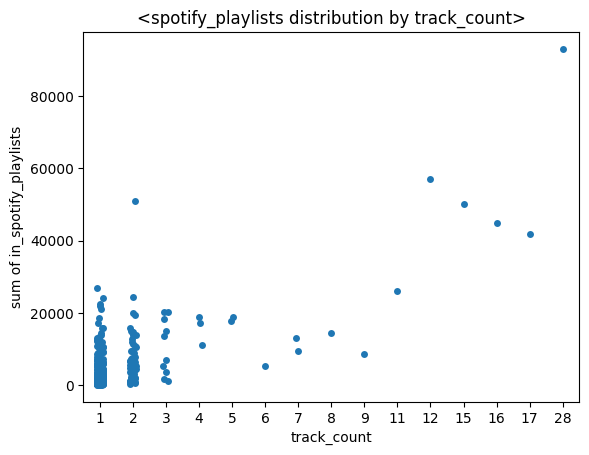

In [51]:
df_2 = df.copy()
df_2_scatter = df_2.groupby('artist(s)_name').agg({'track_name':'count', 'in_spotify_playlists':'sum'}).sort_values('in_spotify_playlists', ascending=False)
sns.stripplot(data=df_2_scatter, x='track_name', y='in_spotify_playlists')
plt.xlabel('track_count')
plt.ylabel('sum of in_spotify_playlists')
plt.title('<spotify_playlists distribution by track_count>')
plt.show()

## 노래를 많이 낸 가수들이 발매한 음반의 음악적 특성

In [7]:
needed_cols = ['artist(s)_name', 'danceability_%', 'valence_%', 'energy_%',
                    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

In [8]:
top_10 = df.loc[df['artist(s)_name'].isin(artist_song_count.index), needed_cols]
top_10_stacked = top_10.groupby('artist(s)_name').mean().stack().reset_index()

In [37]:
top_10_stacked

,artist(s)_name,level_1,0
0,BTS,danceability_%,66.000000
1,BTS,valence_%,61.000000
2,BTS,energy_%,67.857143
3,BTS,acousticness_%,8.142857
4,BTS,instrumentalness_%,0.000000
...,...,...,...
65,The Weeknd,energy_%,56.214286
66,The Weeknd,acousticness_%,28.500000
67,The Weeknd,instrumentalness_%,2.214286
68,The Weeknd,liveness_%,21.285714


In [9]:
# 각 그룹에서 가장 큰 세 개의 항목 추출
top3 = top_10_stacked.groupby('artist(s)_name').apply(lambda x: x.nlargest(3, 0)).reset_index(drop=True)
top3.groupby('artist(s)_name')['level_1'].apply(list).reset_index().rename(columns={'level_1':'musical_features'})
# 노래를 가장 많이 낸 가수들의 음악적 특성은 아래와 같다.

C:\Users\user\AppData\Local\Temp\ipykernel_30360\2925238116.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3 = top_10_stacked.groupby('artist(s)_name').apply(lambda x: x.nlargest(3, 0)).reset_index(drop=True)


,artist(s)_name,musical_features
0,BTS,"[energy_%, danceability_%, valence_%]"
1,Bad Bunny,"[danceability_%, energy_%, valence_%]"
2,"Drake, 21 Savage","[danceability_%, energy_%, valence_%]"
3,Feid,"[danceability_%, energy_%, valence_%]"
4,Harry Styles,"[danceability_%, energy_%, valence_%]"
5,Kendrick Lamar,"[danceability_%, acousticness_%, energy_%]"
6,Morgan Wallen,"[energy_%, valence_%, danceability_%]"
7,SZA,"[danceability_%, energy_%, valence_%]"
8,Taylor Swift,"[danceability_%, energy_%, valence_%]"
9,The Weeknd,"[danceability_%, energy_%, valence_%]"


In [11]:
df.loc[df.loc[df['artist(s)_name'] == 'Kendrick Lamar', 'acousticness_%'].idxmax(), 'track_name']

'Rich - Interlude'

In [16]:
df.loc[df['artist(s)_name'] == 'Kendrick Lamar', 'track_name']

763                   N95
768       United In Grief
771           Rich Spirit
776          Count Me Out
783    Worldwide Steppers
797      Rich - Interlude
801                 Crown
802        Auntie Diaries
804                Mirror
807    Savior - Interlude
821      The Heart Part 5
Name: track_name, dtype: object

In [18]:
df.loc[df['artist(s)_name'] == 'Kendrick Lamar', 'track_name'].str.contains('Interlude').sum()

2

## mode와의 연관성

<Axes: xlabel='mode', ylabel='count'>

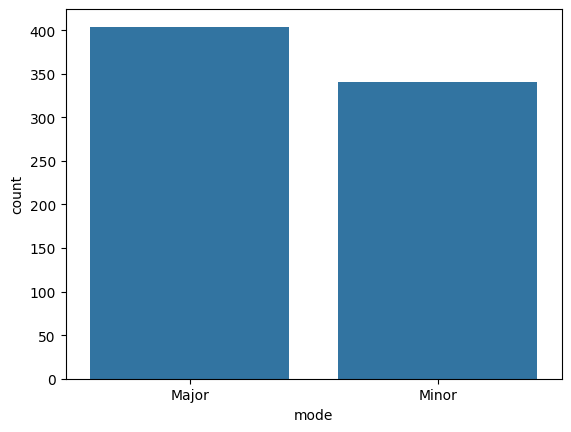

In [39]:
sns.countplot(data=df, x='mode')

In [40]:
musical_features = ['danceability_%', 'valence_%', 'energy_%',
                    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

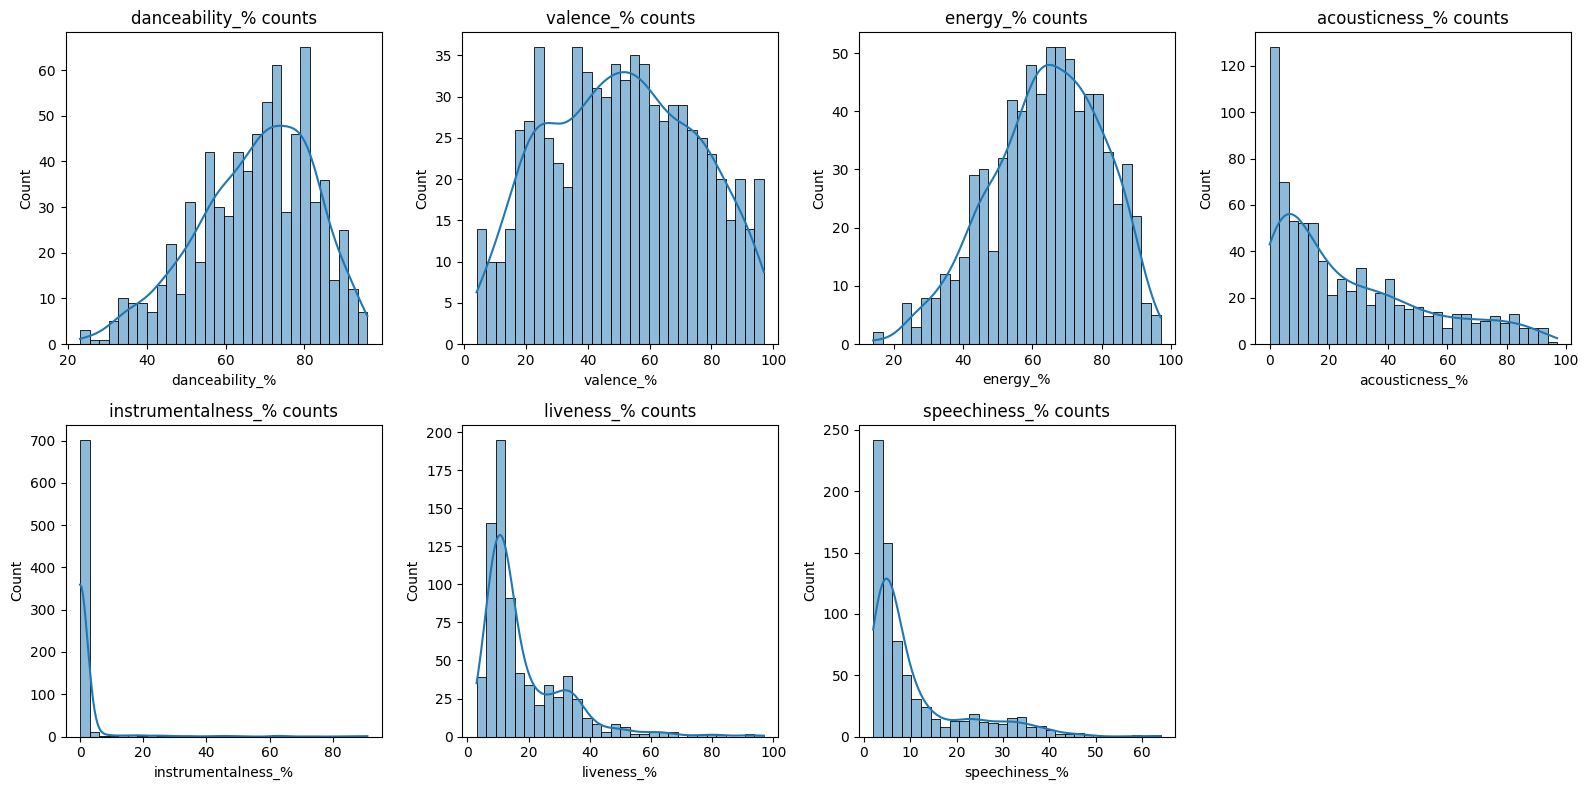

In [41]:
row_count = len(musical_features) // 3
plt.figure(figsize=(16, 4*row_count))

for i, feature in enumerate(musical_features, 1):
    plt.subplot(row_count, 4, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"{feature} counts")
plt.tight_layout()
plt.show()

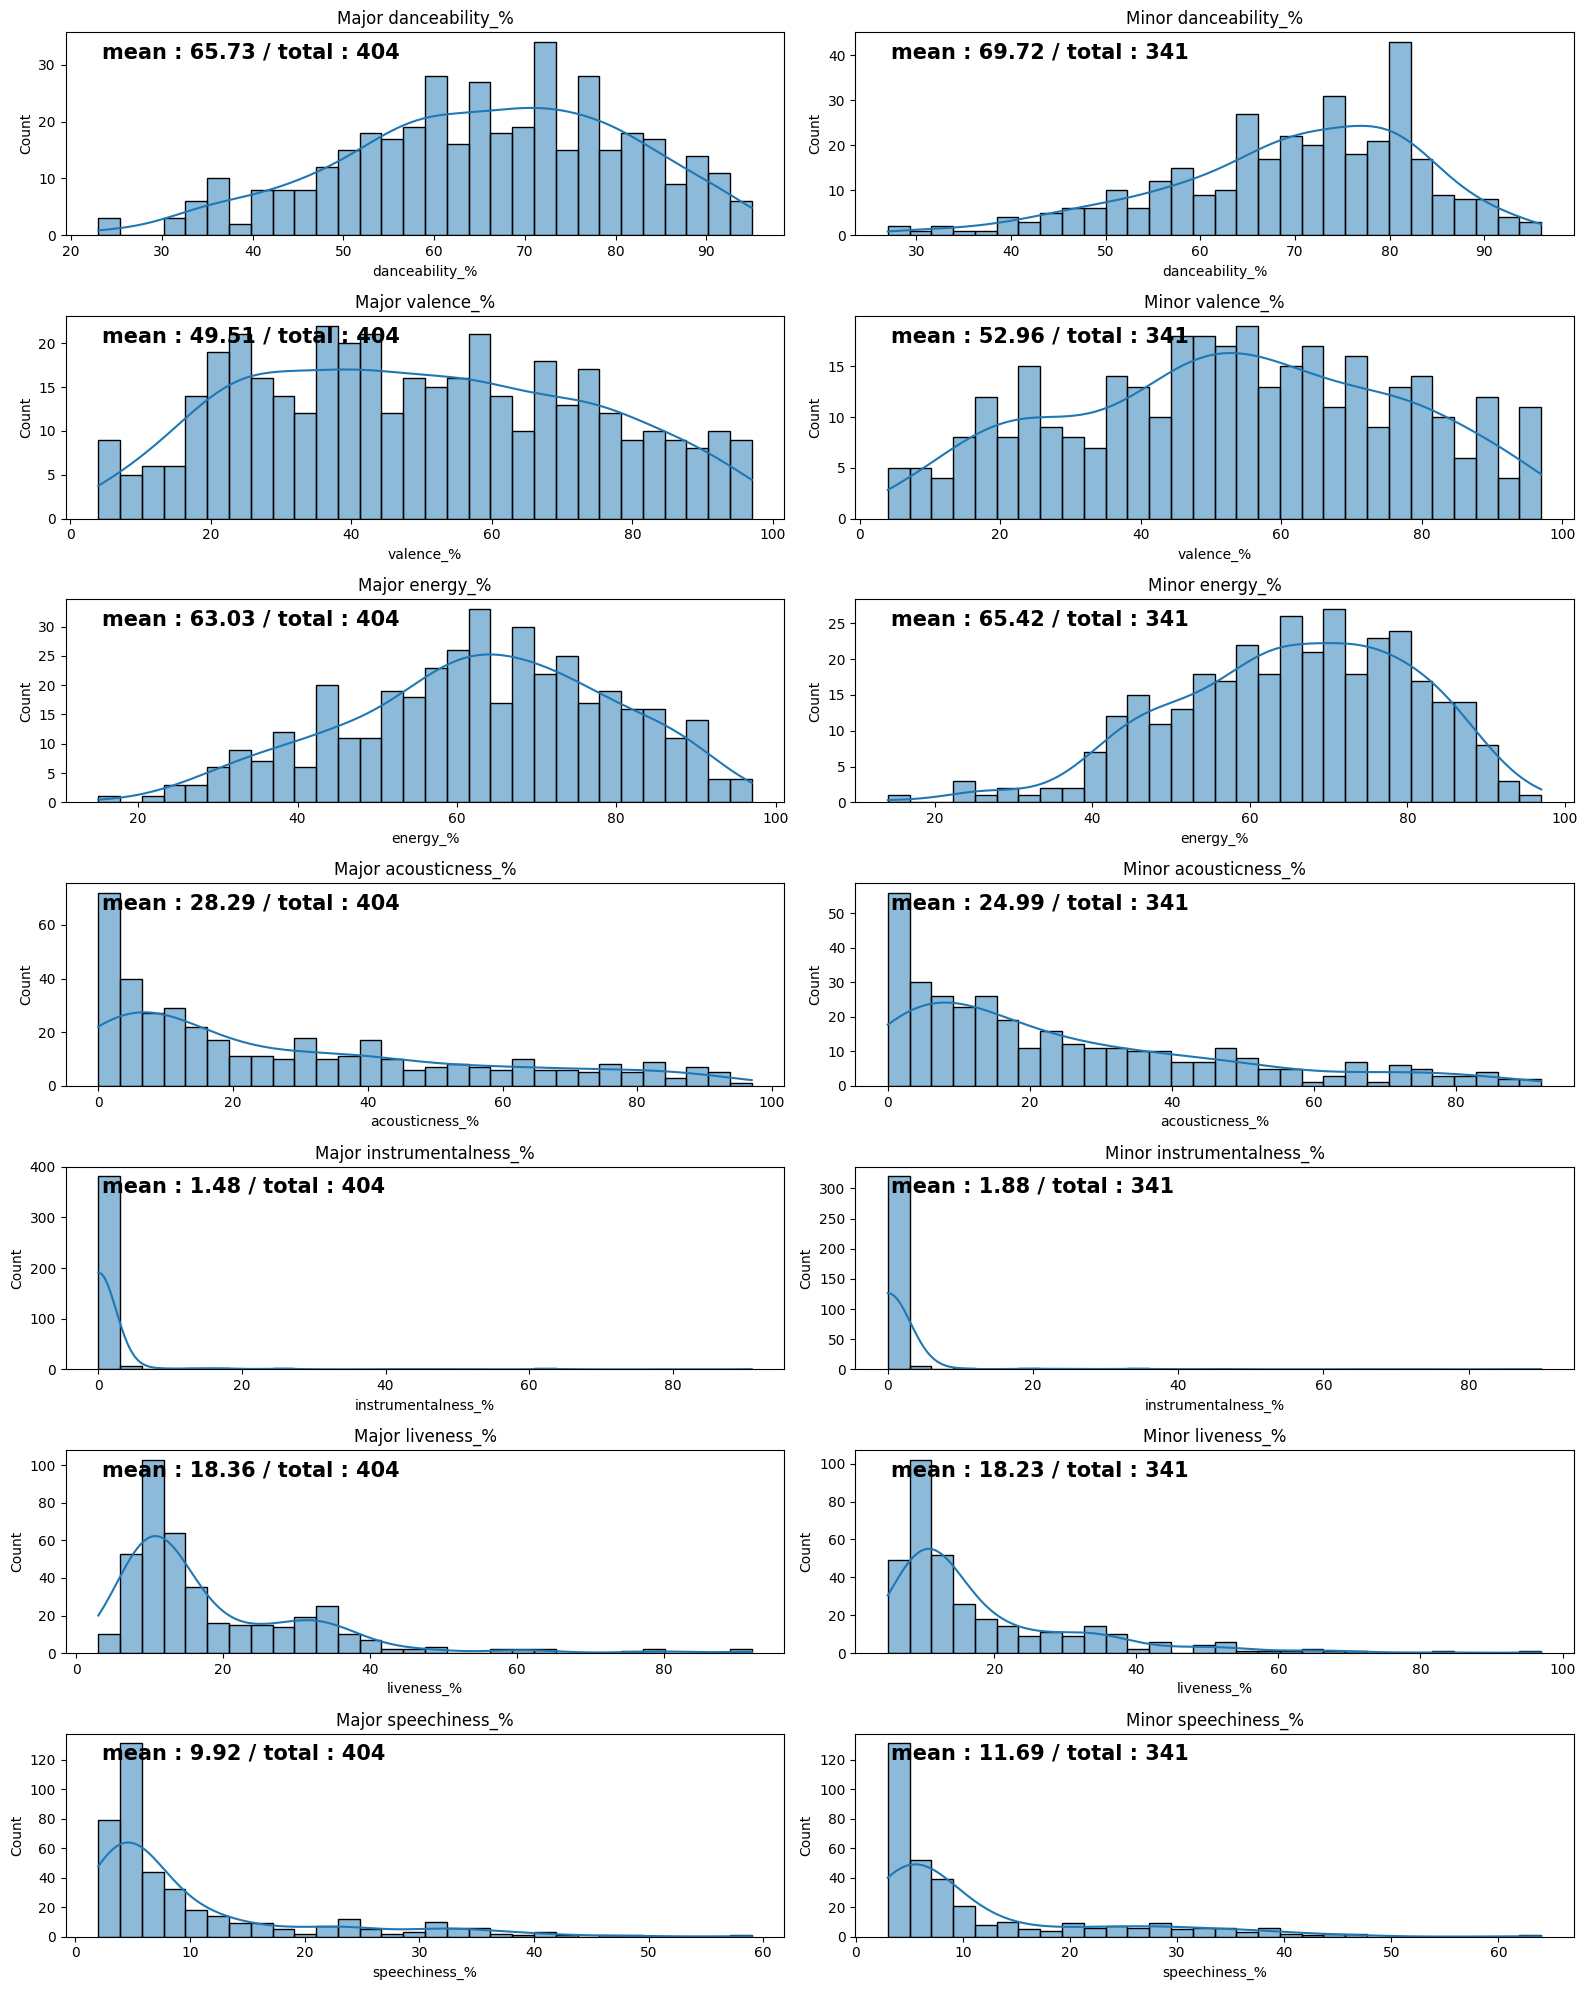

In [42]:
musical_features = ['danceability_%', 'valence_%', 'energy_%',
                    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
plt.figure(figsize=(16, 20))

for i, col in enumerate(musical_features,1):
    major = df.loc[df['mode']=='Major', col]
    minor = df.loc[df['mode']=='Minor', col]
    plt.subplot(len(musical_features), 2, 2*i-1)
    plt.title(f'Major {col}')
    plt.text(0.05, 0.95, f'mean : {major.mean():.2f} / total : {len(major)}', transform=plt.gca().transAxes,
             verticalalignment='top', fontsize=15, color='black', fontweight='bold')
    sns.histplot(major, bins=30, kde=True)
    plt.subplot(len(musical_features), 2, 2*i)
    plt.title(f'Minor {col}')
    plt.text(0.05, 0.95, f'mean : {minor.mean():.2f} / total : {len(minor)}', transform=plt.gca().transAxes,
             verticalalignment='top', fontsize=15, color='black', fontweight='bold')
    sns.histplot(minor, bins=30, kde=True)
plt.tight_layout()
plt.show()

## key와 연관성

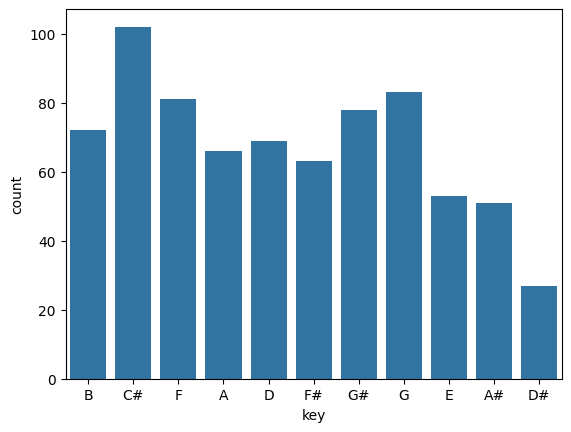

In [43]:
sns.countplot(data=df, x='key')
plt.show()

In [44]:
df.groupby('key')[musical_features].mean()
# 큰 연관성은 없어보인다.

,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
key,,,,,,,
A,64.636364,47.030303,59.121212,29.954545,2.590909,18.106061,9.833333
A#,69.039216,52.529412,62.392157,26.313725,0.294118,15.176471,12.392157
B,69.111111,52.819444,68.083333,23.986111,1.347222,18.041667,10.847222
C#,69.068627,50.078431,66.166667,21.705882,1.264706,19.088235,12.745098
D,67.594203,48.217391,62.898551,27.710145,0.898551,19.101449,9.739130
D#,66.592593,48.777778,61.000000,32.074074,3.555556,17.740741,11.740741
E,65.792453,41.867925,63.283019,28.981132,2.754717,19.000000,8.603774
F,67.037037,52.987654,64.469136,28.407407,2.851852,18.765432,10.283951
F#,68.476190,58.253968,65.158730,32.349206,0.444444,18.968254,10.190476


In [45]:
df_temp = df[['key', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].copy()

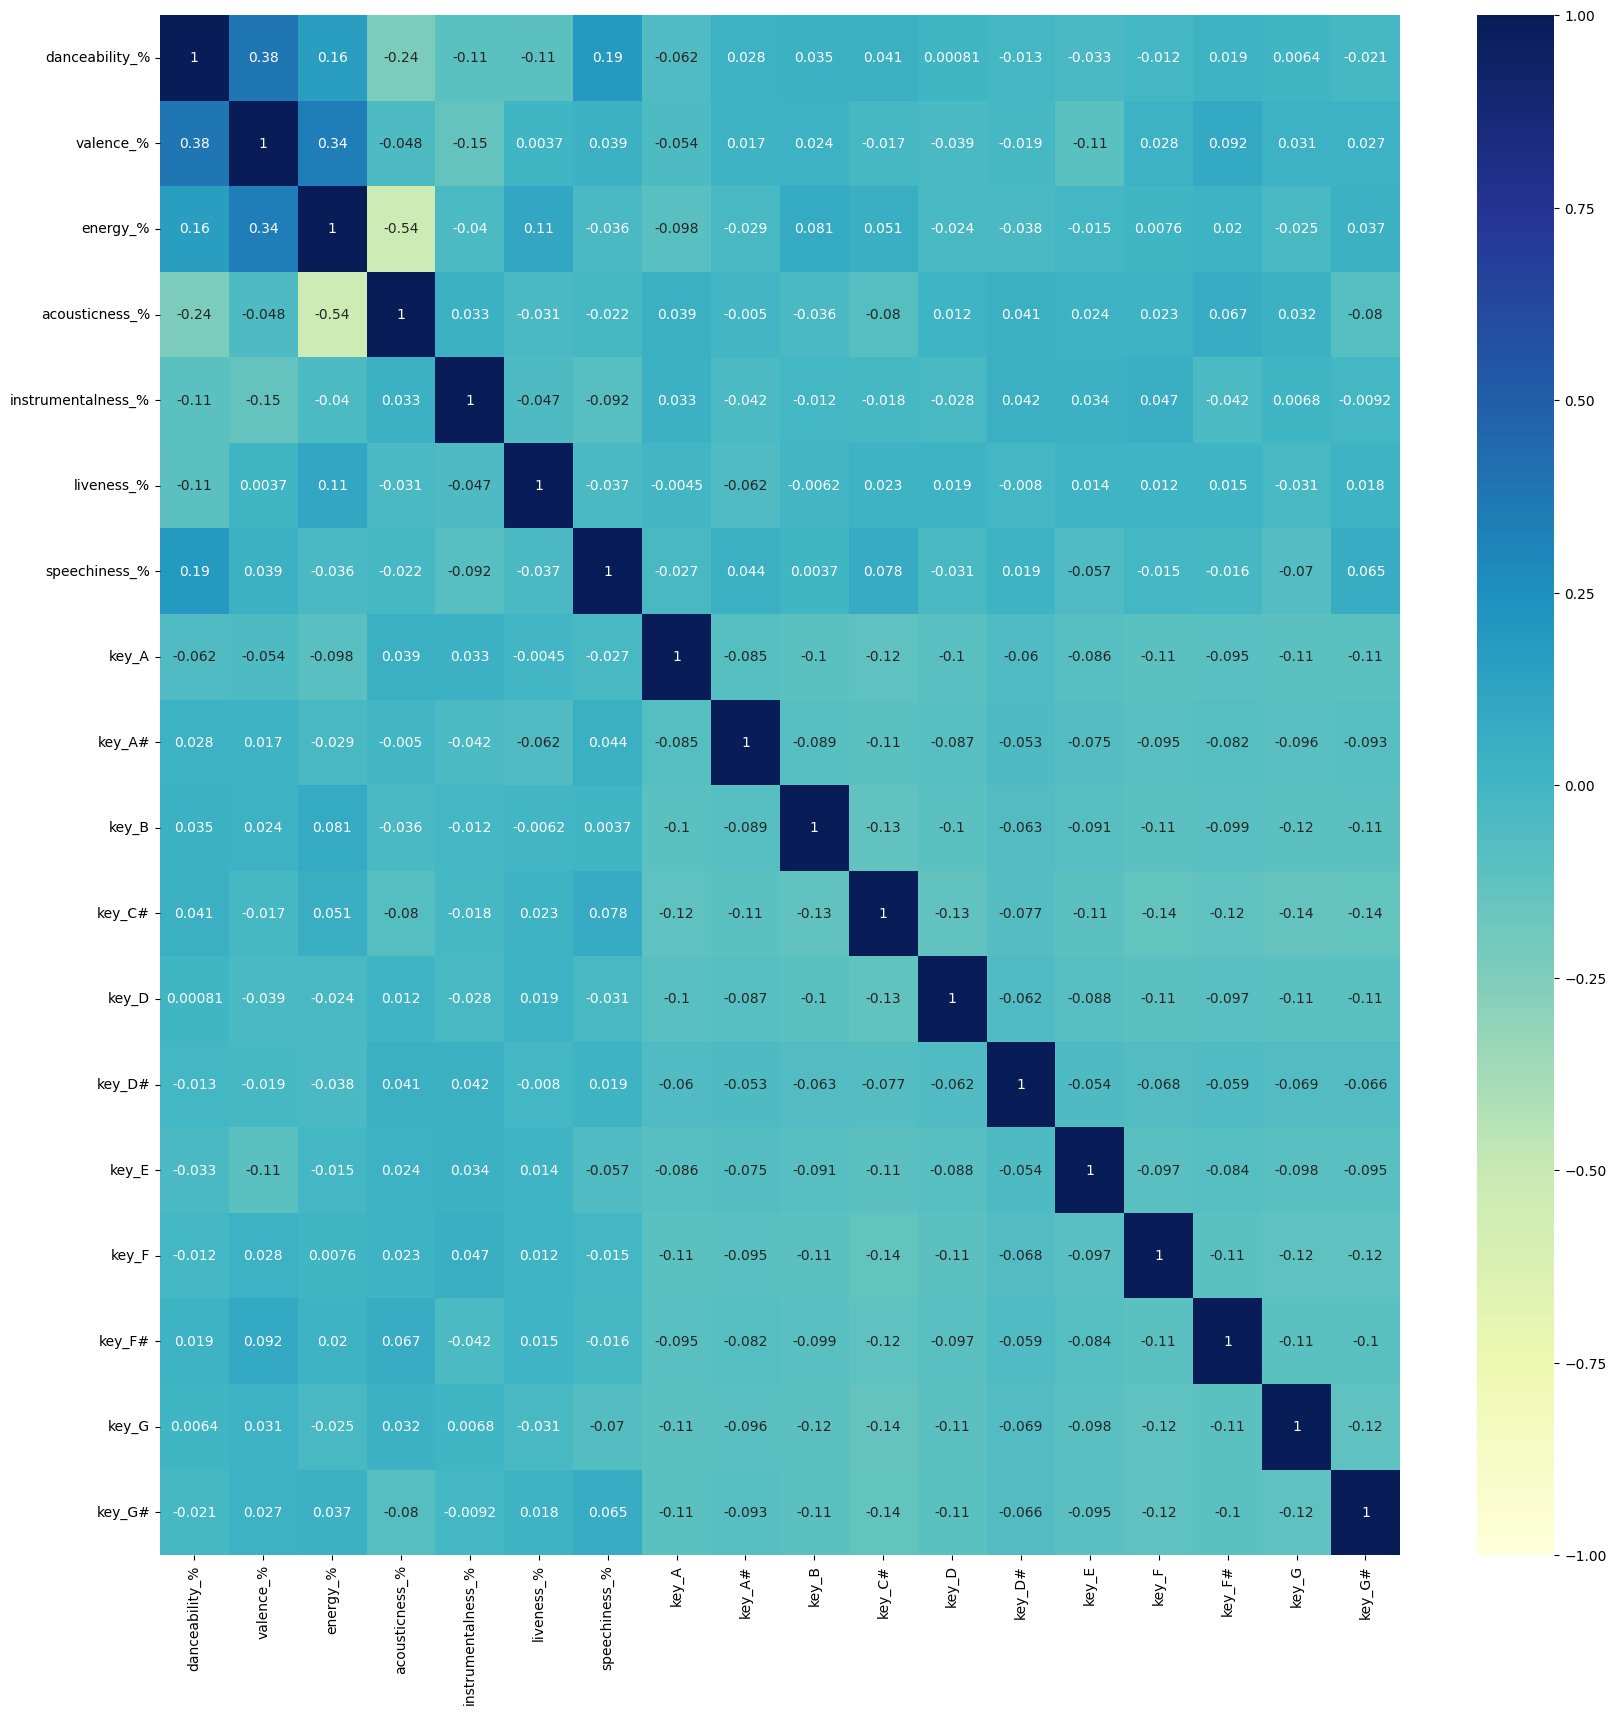

In [46]:
dummies = pd.get_dummies(df_temp, 'key').astype(int)

plt.figure(figsize=(20, 20))
corr_ = dummies.corr()
sns.heatmap(corr_, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.show()

# 상관관계 없다.